The GripQL API allows a user to download the schema of a graph. This outlines the different types of nodes, the edges the connect them and the structure of the documents stored in graph elements. A graph document has a `graph` field that has the name, a `vertices` field and an `edges` field.

```json
{"graph': "bmeg_rc1_2",
 "vertices': [{"gid": "Compound",
   "label": "Compound",
   "data": {"name": "STRING", "term": "STRING", "term_id": "STRING"}},
  ...],
  "edges": [{"gid": "(Project)--InProgram->(Program)",
   "label": "InProgram",
   "from": "Project",
   "to": "Program",
   "data": {}},
```

Connect to BMEG server

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import gripql
from networkx.drawing.nx_agraph import graphviz_layout

In [2]:
conn = gripql.Connection("https://bmeg.io/api", credential_file="/tmp/bmeg_credentials.json")

Print avalible graphs

In [3]:
print(conn.listGraphs())

['bmeg_rc1_2', 'bmeg_rc1_2__schema__']


In [4]:
O = conn.graph("bmeg_rc1_2")

Get the schema graph

In [5]:
schema = conn.getSchema("bmeg_rc1_2")

Start build graph using [NetworkX](https://networkx.github.io/)

In [6]:
g = nx.MultiDiGraph()

In [7]:
for v in schema['vertices']:
    g.add_node(v['gid'])
for e in schema['edges']:
    g.add_edge(e['from'], e['to'])

Draw Schema Graph

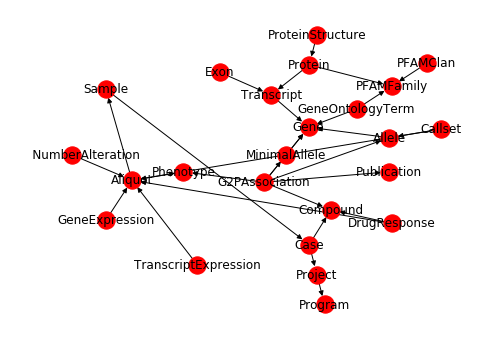

In [8]:
pos = graphviz_layout(g, prog='twopi', args='')
fig, ax = plt.subplots(1, 1, figsize=(8, 6));
nx.draw(g, pos, ax=ax, with_labels=True)